# 📈 Data Analysis Python Project - Blinkit Data Analysis project

## Blinkit Sales Data Analysis Project

This project analyzes Blinkit's sales dataset to understand:
- Sales performance by item type and fat content
- Outlet size and location impact on sales
- Sales trend by outlet establishment year

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import raw data

In [3]:
df=pd.read_csv("blinkit_data.csv")

## Dataset Overview

The dataset contains the following columns:
- Item Type
- Item Fat Content
- Outlet Size
- Outlet Location Type
- Outlet Establishment Year
- Sales
- Rating

In [4]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [5]:
df.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


In [2]:
## data Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
# Look at the Statical Data view

df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2010.831867,0.066132,12.857645,140.992782,3.965857
std,8.371760,0.051598,4.643456,62.275067,0.605651
min,1998.000000,0.000000,4.555000,31.290000,1.000000
25%,2000.000000,0.026989,8.773750,93.826500,4.000000
50%,2012.000000,0.053931,12.600000,143.012800,4.000000
75%,2017.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [9]:
df.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

In [10]:
# size of Data in terms of (rows and Columns)

print("Data Size : ",df.shape)

Data Size :  (8523, 12)


In [11]:
# list of all columns present in data

df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [12]:
# check Data Types of all columns

df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

## Data Cleaning

In [13]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [14]:
df['Item Fat Content']=df['Item Fat Content'].replace({'low fat':'Low Fat',
                                                      'LF':'Low Fat',
                                                      'reg':'Regular'})

In [15]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


In [16]:
print(df['Item Type'].unique())

['Fruits and Vegetables' 'Health and Hygiene' 'Frozen Foods' 'Canned'
 'Soft Drinks' 'Household' 'Snack Foods' 'Meat' 'Breads' 'Hard Drinks'
 'Others' 'Dairy' 'Breakfast' 'Baking Goods' 'Seafood' 'Starchy Foods']


## Bussiness Requirenment


### KPI's Requirenment

- Total Sales
- Average Sales
- Total Items Sold
- Average Customer Rating

These KPIs provide a quick summary of the dataset and help understand the overall sales health of Blinkit outlets.


In [17]:
# Total Sales

total_sales=df['Sales'].sum()

In [18]:
# Average Sales

avg_sales=df['Sales'].mean()

In [19]:
# No Of Items Sold

no_of_item_sold=df['Sales'].count()

In [20]:
# Average rating

avg_rating=round(df['Rating'].mean(),2)

In [21]:
# Display

print(f'Total Sales:      ${total_sales:,.1f}')
print(f'Average Sales:    ${avg_sales:,.1f}')
print(f'Total Items Sold: {no_of_item_sold:,.1f}')
print(f'Average Ratings:  {avg_rating:,.1f}')

Total Sales:      $1,201,681.5
Average Sales:    $141.0
Total Items Sold: 8,523.0
Average Ratings:  4.0


## Charts Requirenment

### Total Sales by Item Fat Content

This visualization shows how total sales are distributed between different item fat content categories such as Regular and Low Fat.
It helps understand customer preferences based on nutritional product types and their contribution to overall revenue.


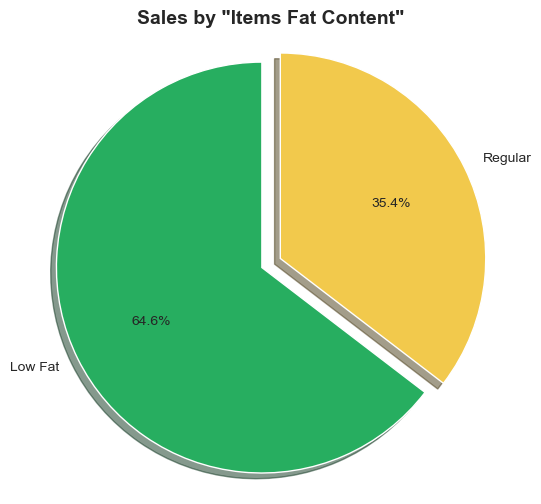

In [22]:
sales_by_fat=df.groupby('Item Fat Content')['Sales'].sum()
plt.style.use('seaborn-v0_8-whitegrid')
colors = ['#27AE60', '#F2C94C', '#000000']  # green, yellow, black
explode = [0.05] * len(sales_by_fat)

plt.figure(figsize=(6,6))
plt.pie(
    sales_by_fat,
    labels = sales_by_fat.index,
    autopct='%.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'},  # clean borders
    explode=explode,
    shadow=True
)


plt.title('Sales by "Items Fat Content"', fontsize=14, fontweight='bold')
plt.axis('equal')


plt.show()


### Insight:
- Regular fat items contribute a larger share of total sales compared to low fat items.
- This indicates that customers prefer regular fat products more than low fat alternatives.


### Total Sales by Item Type

This bar chart represents the total sales generated by each item category.
It helps identify the best-selling and least-selling product types, enabling better inventory and product planning.


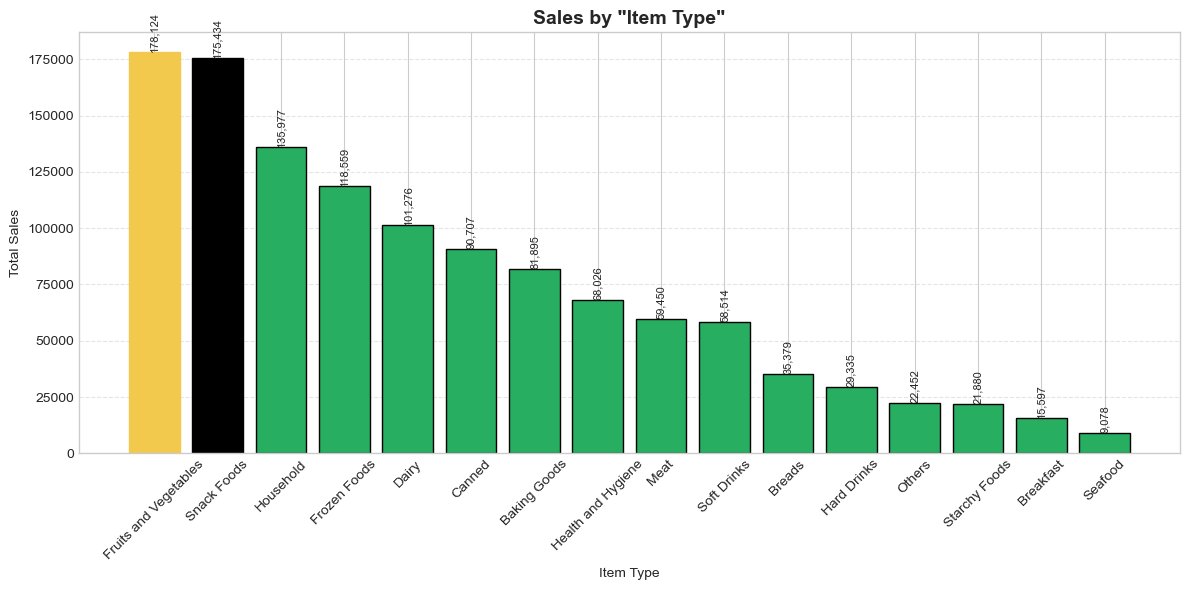

In [23]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

blinkit_colors = ['#27AE60', '#F2C94C', '#000000']  # green, yellow, black

plt.figure(figsize=(12,6))

bars = plt.bar(
    sales_by_type.index,
    sales_by_type.values,
    color=blinkit_colors[0],   # green bars
    edgecolor='black'
)

plt.title('Sales by "Item Type"', fontsize=14, fontweight='bold')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')

plt.xticks(rotation=45)

# Grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Highlight top 3 categories with different colors
for i, bar in enumerate(bars):
    if i == 0:
        bar.set_color('#F2C94C')   # highest sales - yellow
    elif i == 1:
        bar.set_color('#000000')   # second highest - black

# Value labels on bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f'{bar.get_height():,.0f}',
        ha='center',
        va='bottom',
        fontsize=8,
        rotation=90
    )

plt.tight_layout()
plt.show()


### Insight:
- Certain item types generate significantly higher sales compared to others.
- Low performing item categories contribute less to overall revenue and may require promotional strategies.


## Fat Content by Outlet Location Type

This grouped bar chart compares sales of Regular and Low Fat items across different outlet location tiers.
It helps understand how customer preferences vary based on outlet location type.


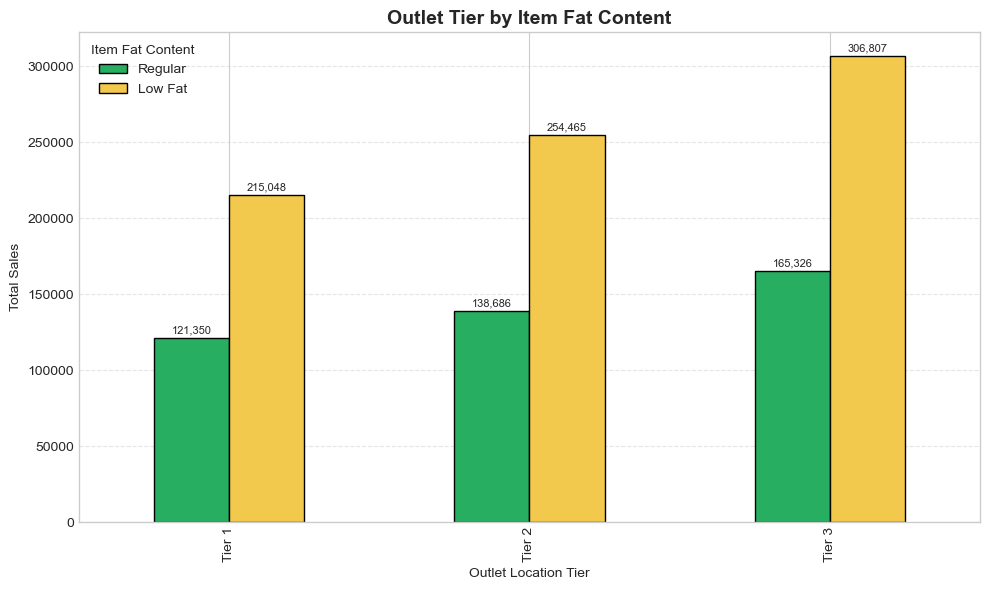

In [24]:
grouped = df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular','Low Fat']]

blinkit_colors = ['#27AE60', '#F2C94C']  # Regular, Low Fat

ax = grouped.plot(
    kind='bar',
    figsize=(10,6),
    color=blinkit_colors,
    edgecolor='black'
)

plt.title('Outlet Tier by Item Fat Content', fontsize=14, fontweight='bold')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')

plt.legend(title='Item Fat Content')

# Grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}', fontsize=8, padding=2)

plt.tight_layout()
plt.show()


### Insight:
- Regular fat items perform better across most outlet locations.
- Sales patterns differ slightly between outlet tiers, indicating location-based customer behavior.


## Total Sales by Outlet Establishment Year

This line chart shows the trend of total sales based on the outlet establishment year.
It helps analyze how the age of outlets impacts sales performance over time.


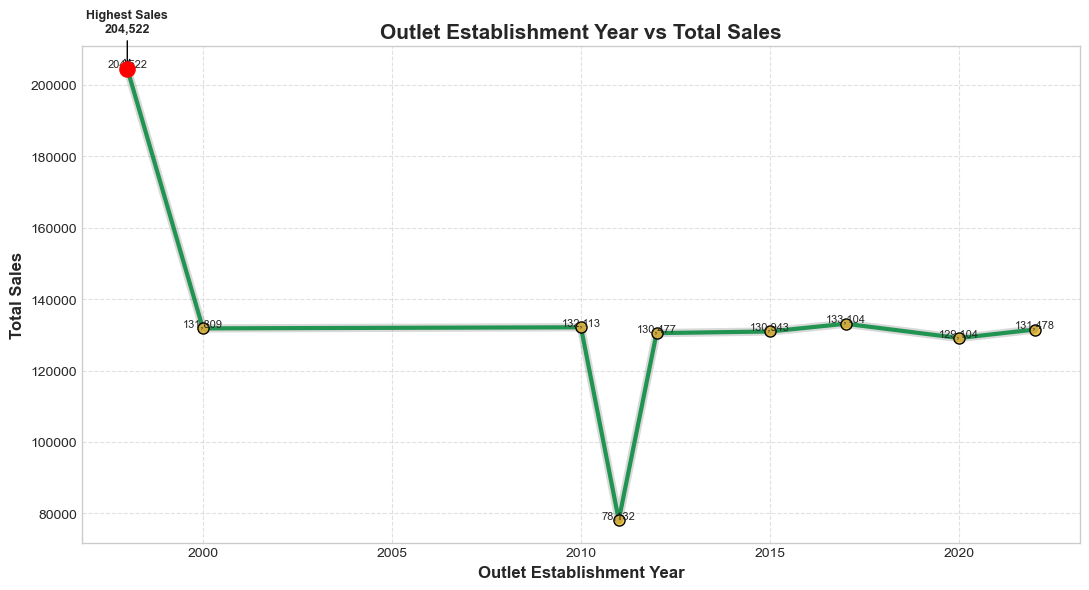

In [25]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(11,6))
plt.style.use('seaborn-v0_8-whitegrid')

blinkit_green = '#27AE60'
blinkit_yellow = '#F2C94C'
blinkit_black = '#000000'

# Plot main line
plt.plot(
    sales_by_year.index,
    sales_by_year.values,
    marker='o',
    linestyle='-',
    linewidth=3,
    color=blinkit_green,
    markerfacecolor=blinkit_yellow,
    markeredgecolor=blinkit_black,
    markersize=8
)

# Add shadow/glow effect
plt.plot(
    sales_by_year.index,
    sales_by_year.values,
    linewidth=6,
    alpha=0.15,
    color=blinkit_black
)

plt.xlabel('Outlet Establishment Year', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales', fontsize=12, fontweight='bold')
plt.title('Outlet Establishment Year vs Total Sales', fontsize=15, fontweight='bold')

# Grid styling
plt.grid(True, linestyle='--', alpha=0.6)

# Highlight highest sales point
max_year = sales_by_year.idxmax()
max_sales = sales_by_year.max()

plt.scatter(max_year, max_sales, color='red', s=120, zorder=5)
plt.annotate(
    f'Highest Sales\n{max_sales:,.0f}',
    xy=(max_year, max_sales),
    xytext=(max_year, max_sales + max_sales*0.05),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    ha='center',
    fontsize=9,
    fontweight='bold'
)

# Add value labels
for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


### Insight:
- Sales tend to increase for newer outlets compared to older ones.
- The highest sales were recorded in a specific establishment year, indicating peak outlet performance.


## Sales Distribution by Outlet Size

This donut chart represents the proportion of total sales contributed by different outlet sizes such as Small, Medium, and High.
It helps understand how outlet size affects revenue generation.


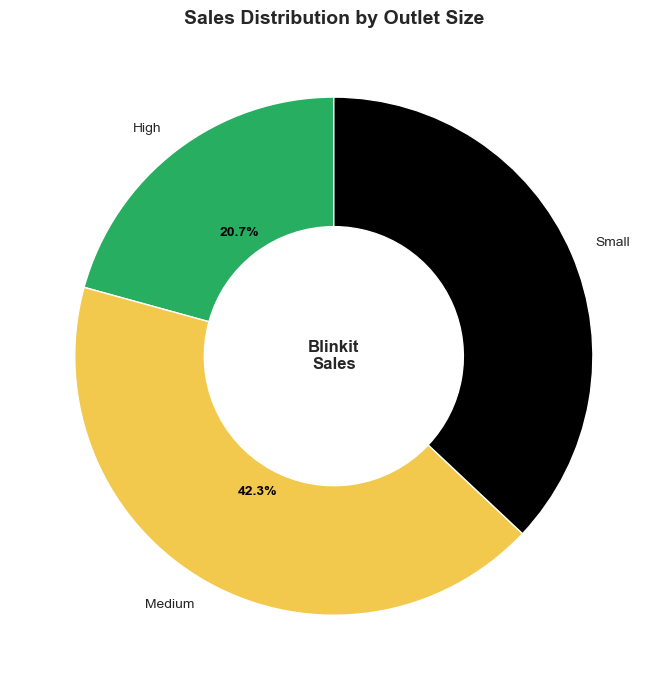

In [26]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(7,7))
plt.style.use('seaborn-v0_8-whitegrid')

blinkit_colors = ['#27AE60', '#F2C94C', '#000000']

wedges, texts, autotexts = plt.pie(
    sales_by_size,
    labels=sales_by_size.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=blinkit_colors,
    wedgeprops={'width':0.5, 'edgecolor':'white'},
    #shadow=True
)

# Center text (donut style)
plt.text(0, 0, 'Blinkit\nSales', ha='center', va='center',
         fontsize=12, fontweight='bold')

plt.title('Sales Distribution by Outlet Size', fontsize=14, fontweight='bold')

# Beautify percentage text
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()


### Insight:
- Medium and large outlets contribute the highest share of total sales.
- Smaller outlets contribute comparatively less to overall revenue.


## Total Sales by Outlet Location Type

This horizontal bar chart shows total sales across different outlet location tiers.
It helps evaluate which outlet locations perform best in terms of revenue.


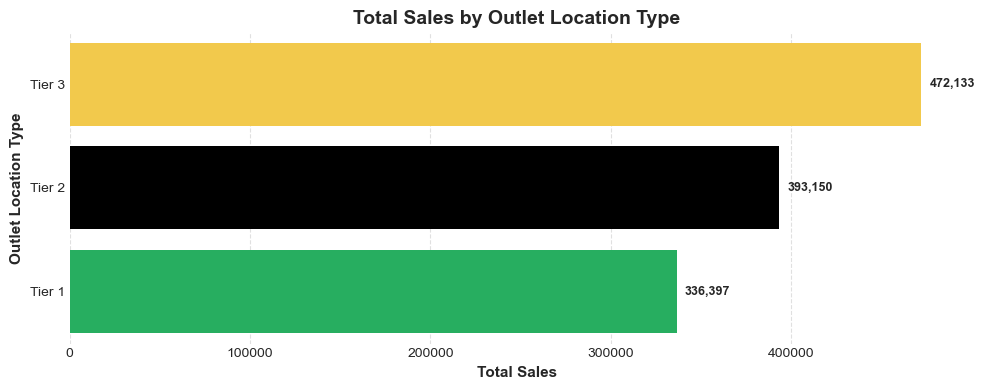

In [27]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales', ascending=False)

plt.figure(figsize=(10,4))
plt.style.use('seaborn-v0_8-whitegrid')

blinkit_green = '#27AE60'
blinkit_yellow = '#F2C94C'
blinkit_black = '#000000'

ax = sns.barplot(
    x='Sales',
    y='Outlet Location Type',
    data=sales_by_location,
    palette=[blinkit_green, blinkit_yellow, blinkit_black]
)

# Title & labels
plt.title('Total Sales by Outlet Location Type', fontsize=14, fontweight='bold')
plt.xlabel('Total Sales', fontsize=11, fontweight='bold')
plt.ylabel('Outlet Location Type', fontsize=11, fontweight='bold')

# Grid styling
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Highlight highest sales bar
ax.patches[0].set_facecolor(blinkit_yellow)
ax.patches[1].set_facecolor(blinkit_black)
ax.patches[2].set_facecolor(blinkit_green)

# Add value labels
for bar in ax.patches:
    width = bar.get_width()
    plt.text(
        width + (sales_by_location['Sales'].max()*0.01),
        bar.get_y() + bar.get_height()/2,
        f'{int(width):,}',
        va='center',
        fontsize=9,
        fontweight='bold'
    )

# Remove top & right borders
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


### Insight:
- Tier 3 outlets generate the highest total sales.
- Tier 1 outlets show lower sales compared to other outlet tiers.


# Conclusion

From the analysis:
- Regular fat items dominate sales over low-fat items.
- Certain item categories perform significantly better than others.
- Outlet size and location type strongly impact total sales.
- Sales trend shows growth with newer outlets.

These insights can help Blinkit optimize inventory, outlet strategy, and product focus.
